# The Data: 'What's in each column'
A friend of mine running for the local council has procured the voter registration data for the area and is willing to share it with me in return for my help analysing it. Here is an intial investigation of it.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the data
voters = pd.read_csv('data_raw_NOGIT/voters_district3.txt', sep='\t')
households = pd.read_csv('data_raw_NOGIT/households_district3.txt', sep='\t')
# this file has 'numVoters', 'numDems', 'numRepubs' calculated from the voter tables and populated
households_with_count = pd.read_csv('data_raw_NOGIT/AK_hhld_withVoterCounts.txt', sep='\t')

In [3]:
print(voters.columns)
print(households.columns)

Index(['VoterID', 'Status', 'Abbr', 'Affidavit', 'LastVoted', 'Salutation',
       'LastName', 'FirstName', 'MiddleName', 'Suffix', 'HouseNumber',
       'HouseNumberSuffix', 'StreetPrefix', 'Street', 'StreetType',
       'BuildingNumber', 'AptNumber', 'City', 'State', 'Zip', 'Precinct',
       'PrecinctSub', 'Party', 'RegDate', 'ImageID', 'Phone1', 'Phone2',
       'Military', 'Gender', 'PAV', 'BirthPlace', 'BirthDate', 'CareOf',
       'MailStreet', 'MailCity', 'MailState', 'MailZip', 'MailCountry',
       'LTDate', 'Email', 'RegDateOriginal', 'PermCategory', 'PrecinctName',
       'ResAddrLine1', 'ResAddrLine2', 'E1_110816', 'E2_060716', 'E3_110414',
       'E4_060314', 'E5_110612', 'E6_060512', 'District', 'VoterScore',
       'VoterScorePossible', 'VoterScorePctOfPoss', 'Household'],
      dtype='object')
Index(['Household_Id', 'FullAddress', 'HouseNumber', 'HouseNumberSuffix',
       'StreetPrefix', 'Street', 'StreetType', 'BuildingNumber',
       'ApartmentNumber', 'City', 'Stat

## Voter Data
Lets review and summarize the Voter data to understand what we have:


**13307** total rows and **56** columns of data

| Column(s) | Description |
|:---:|:---|
| VoterID  | an interger somewhere in the range of 68 - 2514972 - not sure where this is referenced/created but could be replaced by a random number. |
| Status | A or V for Absentee or Poll Voter (all entries are set to 'A') |
| Abbr | an integer in range 1 and 116 (unclear relevance) |
| Affidavit | an alpha numeric code identifing the voter registration affidavit used to register to vote |
| LastVoted | a mostly empty column (only 6 entries) not clear what's here |
| Name & Address | a group of columns identifing the voters and their address: <br> 'Salutation', 'LastName', 'FirstName', 'MiddleName', 'Suffix', 'HouseNumber', 'HouseNumberSuffix', 'StreetPrefix', 'Street', 'StreetType', 'BuildingNumber', 'AptNumber', 'City', 'State', 'Zip', |
| 'Precinct','PrecinctSub',| Precinct number run from 831730 to 835500<br> PrecinctSub are: value (count): 0 (10274), 1 (1603), 2 (1430)|
| Party | the three letter code for declared Political affiliation, including no party preference (NPP) and unknown(UNK) |
| 'RegDate' | date of registration (possibly in this country/california) - can be converted to datetime with `pd.to_datetime(voters.RegDate.map(lambda x: x.replace(' 0:00', '')))` |
| 'ImageID' | an integer between 0 and 48277945 |
| Phone | two fields for phone numbers 'Phone1', 'Phone2' |
| Military | Is voter military N (13298), Y (9)|
| Gender | Gender of Voter F (4212), M (3872), NaN (5223) - Significant missing data |
| PAV | is voter a Permanent Absentee Voter Y (8966), N (4341), includes mail in ballots |
| BirthPlace | two or three letter code indicating state or country of birth NaN (1296), not super clean |
| BirthDate | birth date - can be converted to datetime with `pd.to_datetime(voters.BirthDate.map(lambda x: x.replace(' 0:00', '')))` |
| Mailing address | a group of columns identifying the voters mailing address:<br>'CareOf', 'MailStreet', 'MailCity', 'MailState', 'MailZip', 'MailCountry' |
| LTDate | unclear at this point can be converted to datetimes with `pd.to_datetime(voters.LTDate.map(lambda x: x.replace(' 0:00', '')))` and has range from 1972-09-30 to 2018-05-23 with a mode of 2017-10-13<br> most frequent values are 2017-10-13 (7255), 2017-11-15 (301), 2017-11-14 (284), 2018-05-08 (93) |
| email | email address's column is quite sparce NaN (9009), some emails are repeated for multiple voters |
| RegDateOriginal | date of original registration - can be converted to datetime with `pd.to_datetime(voters.RegDateOriginal.map(lambda x: x.replace(' 0:00', '')))`<br> 7558 Voters have the same date in this column as the 'RegDate' column and 5749 have a differnent date, could see if there is a correlation with birth date. |
| PermCategory | a relatively sparce NaN (4341) category with 14 other categories, look like types of Millitary and or goverment mode is PR (8463), P2(277), P1(78), E-FDO (56), and others |
| PrecinctName | formal Precinct Name of this format: 'PRECINCT NO.' + str('Precinct') + '.' + str('PrecinctSub' 2 digit 0 padded) |
| Empty columns | 'ResAddrLine1', 'ResAddrLine2' are both empty |
| PriorElection | 6 prior election information columns 'E1_110816', 'E2_060716', 'E3_110414','E4_060314', 'E5_110612', 'E6_060512'<br>A - voted absentee, N - didn't vote, V - voted, NaN - no info for this election<br>In the june elections (primaries) the type of ballot used by a voter is indicated eg A(DEM), N(REP) etc. |
| District | which district of this data, currently only district 3 could get other 5 districts |
| Voter score cols | three cols currently empty for scoreing 'VoterScore','VoterScorePossible', 'VoterScorePctOfPoss' |
| Household | unique Alpha-numeric code for the voters household key to other data set format HH-######<br> top households have a lot of voters living in them HH-18141(26), HH-20439 (10), HH-17191(10), 5 other Households have 8 voters each, 20 have 7 voters each with more households the fewer voters 3063 households have only 1 voter |

## Household Data
Lets review and summarize the Households data to understand what we have:


**6930** total rows and **23** columns of data

| Column(s) | Description |
|:---:|:---|
| Household_id  | unique Alpha-numeric code for the household format HH-######. |
| Address cols | a group of columns identifing the household and their building and address:  'FullAddress', 'HouseNumber', 'HouseNumberSuffix', 'StreetPrefix', 'Street', 'StreetType', 'BuildingNumber','ApartmentNumber', 'City', 'State', 'Zip' |
| 'Precinct','PrecinctSub',| Precinct number run from 831730 to 835500 |
| calculated cols | Various columns ready for calculations an scoring:<br> 'numVoters', 'numDems', 'numRepubs', 'totalVoterScore', 'totalPossibleScore', 'avgVoteRate', 'numOfPAVs', 'numOfNewVoters' |
| District | which district of this data, currently only district 3 could get other 5 districts |

In [4]:
# seeing sections of the table in turn
households_with_count.iloc[30:40, 15:]

,totalVoterScore,totalPossibleScore,avgVoteRate,numOfPAVs,numOfNewVoters,District,numDems,numRepubs,numVoters
30,NaN,NaN,NaN,NaN,NaN,3,1.0,NaN,1.0
31,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,3.0
32,NaN,NaN,NaN,NaN,NaN,3,1.0,NaN,1.0
33,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2.0
34,NaN,NaN,NaN,NaN,NaN,3,1.0,1.0,2.0
35,NaN,NaN,NaN,NaN,NaN,3,NaN,1.0,2.0
36,NaN,NaN,NaN,NaN,NaN,3,NaN,1.0,2.0
37,NaN,NaN,NaN,NaN,NaN,3,1.0,NaN,2.0
38,NaN,NaN,NaN,NaN,NaN,3,2.0,NaN,3.0
39,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,1.0


In [5]:
# A scratch cell used to pull up details of a table column as needed 
#voters.E1_110816.value_counts(dropna=False)
print(voters.PermCategory.unique())
voters.PermCategory.value_counts(dropna=False)

[nan 'PR' 'P1' 'P4' 'P2' 'E-FDO' 'P3' 'OS' 'FBOO' 'MILL' 'FEDO' 'E-FBO'
 'E-MIL' 'E-MIO' 'MILO']


PR       8463
NaN      4341
P2        277
P1         78
E-FDO      56
P4         24
P3         20
FEDO       19
E-FBO       8
FBOO        7
OS          4
E-MIL       4
MILL        3
E-MIO       2
MILO        1
Name: PermCategory, dtype: int64

### Voter LastVoted Investigation

In [6]:
voters.LastVoted.value_counts(dropna=False)
#voters.loc[voters.LastVoted.notnull(),:]   # uncomment to see these 6 columns

NaN    13301
N          6
Name: LastVoted, dtype: int64

### Voter LTDate Investigation

In [7]:
# quick and dirty investigation for LTDate
ltdate = pd.to_datetime(voters.LTDate.map(lambda x: x.replace(' 0:00', '')))
print(ltdate.describe())
ltdate.value_counts(dropna=False).head(5)

count                   13307
unique                   1817
top       2017-10-13 00:00:00
freq                     7255
first     1972-09-30 00:00:00
last      2018-05-23 00:00:00
Name: LTDate, dtype: object


2017-10-13    7255
2017-11-15     301
2017-11-14     284
2018-05-08      93
2005-12-21      88
Name: LTDate, dtype: int64

### Voter RegDate and RegDateOriginal Investigation

In [8]:
# quick and dirty investigation for 'RegDateOriginal' and 'RegDate'
RegO = pd.to_datetime(voters.RegDateOriginal.map(lambda x: x.replace(' 0:00', '')))
Reg = pd.to_datetime(voters.RegDate.map(lambda x: x.replace(' 0:00', '')))
datecomp = pd.DataFrame({'OrigRegDate':RegO, 'RegDate':Reg})

In [9]:
(datecomp['OrigRegDate'] == datecomp['RegDate']).value_counts()

True     7558
False    5749
dtype: int64

### Voter Precinct Name Investigation

In [10]:
# quick and dirty investigation for 'PrecinctName' 
precinctcomp = voters.loc[:,['PrecinctName', 'Precinct', 'PrecinctSub']]
precinctcomp.head(5)
# likely PrecinctName is of the following pattern 'PRECINCT NO.' + str('Precinct')+'.'+str('PrecinctSub')
precinctcomp['Combined']= (['.'.join(i) for i in 
                        zip(precinctcomp["Precinct"].map(str),precinctcomp["PrecinctSub"].map("{0:0>2}".format))])
precinctcomp['Combined'] = precinctcomp['Combined'].apply(lambda x: "{}{}".format('PRECINCT NO. ', x))
assert (precinctcomp['PrecinctName'] == precinctcomp['Combined']).all()
precinctcomp.head(5)

,PrecinctName,Precinct,PrecinctSub,Combined
0,PRECINCT NO. 832620.02,832620,2,PRECINCT NO. 832620.02
1,PRECINCT NO. 832620.02,832620,2,PRECINCT NO. 832620.02
2,PRECINCT NO. 832900.00,832900,0,PRECINCT NO. 832900.00
3,PRECINCT NO. 832800.00,832800,0,PRECINCT NO. 832800.00
4,PRECINCT NO. 832400.00,832400,0,PRECINCT NO. 832400.00


### Voter Household Investigation

In [11]:
b = voters.Household.value_counts(dropna=False).value_counts()
print('{} household has {} registered voters,\n{} households have {} and\n{} households have {}'.format(
    b.values[-1],b.index[-1], b.values[-2],b.index[-2], b.values[-3],b.index[-3]))
b

1 household has 26 registered voters,
2 households have 10 and
5 households have 8


1     3063
2     2291
3      958
4      425
5      128
6       37
7       20
8        5
10       2
26       1
Name: Household, dtype: int64

In [44]:
def get_full_address(row):
 
    build_num = row.BuildingNumber
    apt_num = row.AptNumber
    if str(build_num) != 'nan':
        build_num = int(row.BuildingNumber)
        apt_num = '{}'.format(str(row.AptNumber))
    elif str(row.AptNumber) != 'nan':
        apt_num = '# {}'.format(str(row.AptNumber))
        
    row['cc_full_add'] = ' '.join([x for x in [str(row.HouseNumber), row.Street,
                                 row.StreetType, str(build_num),
                                               apt_num] if str(x) != 'nan'])
    return row

In [66]:
# Explore Households with different numbers of registered voters.
bigHH = [t.index[i] for i, x in enumerate((voters.Household.value_counts()>20) 
                                          & (voters.Household.value_counts()<30)) if x]
vot_bigHH = voters.loc[voters.Household.isin(bigHH), ['Household','HouseNumber','Street','BuildingNumber', 'AptNumber',
                                                      'StreetType','FirstName','LastName']].sort_values('Household')
vot_bigHH = vot_bigHH.apply(get_full_address, axis=1)
vot_bigHH.set_index(['cc_full_add'], inplace=True)
# NOT PII SAFE
#vot_bigHH[['FirstName','LastName']].groupby(['cc_full_add','LastName','FirstName']).count()

The 26 Voter Household is a residential care provider home (Crestwood Manor).
Both 10 Voter Household looked like regular residential homes, housing multiple groups of related people.
the 8 Voter Households, 1 appeared to be an appartment block where some voter registrations were missing the apt numbers (38801 HASTINGS ST), the others all appeared to be regular residential homes, housing muliple groups of related people

In [67]:
len(voters.loc[(voters.HouseNumber == 38801)
           &(voters.Street == 'HASTINGS'),['HouseNumber','Street','AptNumber','FirstName',
                                           'LastName']].sort_values('AptNumber'))

17

### Perm Category Investigation

In [12]:
print(voters.PermCategory.unique())
voters.PermCategory.value_counts(dropna=False)

[nan 'PR' 'P1' 'P4' 'P2' 'E-FDO' 'P3' 'OS' 'FBOO' 'MILL' 'FEDO' 'E-FBO'
 'E-MIL' 'E-MIO' 'MILO']


PR       8463
NaN      4341
P2        277
P1         78
E-FDO      56
P4         24
P3         20
FEDO       19
E-FBO       8
FBOO        7
OS          4
E-MIL       4
MILL        3
E-MIO       2
MILO        1
Name: PermCategory, dtype: int64

### Prior Election data investigation

In [13]:
# just election voting information
v = voters[['E1_110816', 'E2_060716', 'E3_110414','E4_060314', 'E5_110612', 'E6_060512']]
# moving election name to be a row index called election
v.columns = pd.MultiIndex.from_product([v.columns, ['vote']])
v = v.stack(0)
v.index.set_names('election', level=1, inplace=True)

In [14]:
# The number of different types of vote we are dealing with.
print('Total number of different vote types recorded: {}'.format(len(v['vote'].value_counts(dropna=False))))
v['vote'].value_counts(dropna=False).nlargest(10)

Total number of different vote types recorded: 42


N         24796
A         14756
V          8532
A(DEM)     2956
N(DEM)     2410
V(DEM)     1340
N(NPP)     1162
A(REP)      960
N(REP)      898
N(NP)       747
Name: vote, dtype: int64

In [15]:
# number of individuals and how many elections we have their voting (V,A,N) information for
vc = v.reset_index().rename(columns={'level_0':'ID'}).groupby(['ID']).count().groupby('vote').count().sort_index(ascending=False)
vc.rename(index=str, columns={'election': 'num of voters'}, inplace=True)
vc.index.name = 'num votes in data'
vc['percent'] = 100*vc['num of voters']/13307
vc['cum_perc'] = vc.percent.cumsum()
vc

,num of voters,percent,cum_perc
num votes in data,,,
6,8482,63.740888,63.740888
5,743,5.583527,69.324416
4,519,3.900203,73.224619
3,273,2.051552,75.276170
2,1167,8.769820,84.045991
1,1194,8.972721,93.018712


In [16]:
f = v.reset_index().rename(columns={'level_0':'ID'})
# cleaning the vote column into two columns 'vote' and the 'ballot_type' used
f['ballot_type'] = f['vote'].str.extract('\((.*?)\)', expand=True).fillna('')
f['vote'] = f['vote'].replace('\(.*\)', '', regex=True)

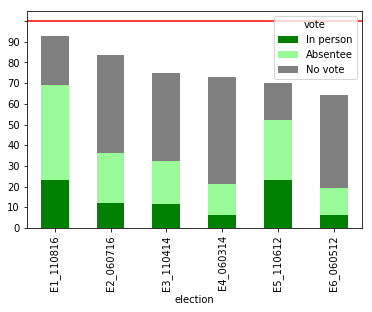

In [17]:
# ignoring ballot_type and grouping by whether someone voted and in which election
to = f[['ID','election','vote']].groupby(['vote','election']).count()
# calculating percent - not used as visible from graph
#to['percent'] = 100*to['ID']/13307
# organizing data for plot (getting vote in desired order in columns)
u = to.unstack('vote')
u.columns = u.columns.droplevel()
u = u[['V', 'A', 'N']].rename(columns={'V':'In person', 'A':'Absentee', 'N':'No vote'})
u.plot(kind='bar', stacked=True, color=['green','palegreen','gray'])
# plotting line at current number of registered voters
plt.axhline(13307, color='r')
plt.yticks(range(0,13307,13307//10), range(0,100,10))
plt.show()